This Dataset comprises of information related to :
* Top Spotify Tracks of 2017 and 2018
* Number of Tracks per Artist in Spotify Top 100 List (2017)
* Number of Tracks per Artist in Spotify Top 100 List (2018)
* Number of Tracks per Artist in Spotify Top 100 List (2017+2018)


I'll be examining the audio features of the tracks in Spotify's Top Songs of 2017 playlist. 
At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year.  The question is: What do these top songs have in common? Why do people like them?

Original Data Source: The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

Data Description: There is one .csv file in the dataset. (featuresdf.csv) This file includes:

Spotify URI for the song
Name of the song
Artist(s) of the song
Audio features for the song (such as danceability, tempo, key etc.)
A more detailed explanation of the audio features can be found in the Metadata tab.


Exploring the Data:
* mean value of audio features
* mean value for danceability
* mean value for energy
* mean value for loudness
* mean value and distplot for instrumentalness feature
* mean value for tempo feature
* mean value for duration feature

In [35]:
import numpy as np 
import pandas as pd 
import os
from datetime import date, datetime, timedelta
from IPython.core import display as ICD
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
top2017=pd.read_csv('top2017.csv')
music=pd.read_csv('featuresdf.csv')
top2018=pd.read_csv('top2018.csv')

In [22]:
print('Top 100 Spotify Tracks in 2018: ')
pd.set_option('display.max_rows', 100)
top2018[['artists','name']]


Top 100 Spotify Tracks in 2018: 


,artists,name
0,Drake,God's Plan
1,XXXTENTACION,SAD!
2,Post Malone,rockstar (feat. 21 Savage)
3,Post Malone,Psycho (feat. Ty Dolla $ign)
4,Drake,In My Feelings
5,Post Malone,Better Now
6,Cardi B,I Like It
7,Calvin Harris,One Kiss (with Dua Lipa)
8,Dua Lipa,IDGAF
9,Marshmello,FRIENDS


In [20]:
artistCounts = top2018['artists'].value_counts()
artistCountsDf = pd.DataFrame(artistCounts)
trace1 = go.Bar(
                x = artistCountsDf.index,
                y = artistCountsDf.artists,
                name = "Top Spotify Tracks 2018",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = artistCountsDf.index)
data = [trace1]

layout = go.Layout(barmode = "group",title='Number of Tracks per Artist in Spotify Top 100 List (2018)', yaxis= dict(title= 'Number of Tracks per Artist'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [25]:
print('Top 100 Spotify Tracks in 2017: ')
pd.set_option('display.max_rows', 100)
top2017[['artists','name']]

Top 100 Spotify Tracks in 2017: 


,artists,name
0,Ed Sheeran,Shape of You
1,Luis Fonsi,Despacito - Remix
2,Luis Fonsi,Despacito (Featuring Daddy Yankee)
3,The Chainsmokers,Something Just Like This
4,DJ Khaled,I'm the One
5,Kendrick Lamar,HUMBLE.
6,Kygo,It Ain't Me (with Selena Gomez)
7,French Montana,Unforgettable
8,Bruno Mars,That's What I Like
9,ZAYN,I Don’t Wanna Live Forever (Fifty Shades Darke...


In [26]:
artistCounts = top2017['artists'].value_counts()
artistCountsDf = pd.DataFrame(artistCounts)
trace1 = go.Bar(
                x = artistCountsDf.index,
                y = artistCountsDf.artists,
                name = "Top Spotify Tracks 2017",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = artistCountsDf.index)
data = [trace1]

layout = go.Layout(barmode = "group",title='Number of Tracks per Artist in Spotify Top 100 List (2017)', yaxis= dict(title= 'Number of Tracks per Artist'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [27]:
frames = [top2017, top2018]
combinedDf = pd.concat(frames)
artistCounts = combinedDf['artists'].value_counts()
artistCountsDf = pd.DataFrame(artistCounts)
trace1 = go.Bar(
                x = artistCountsDf.index,
                y = artistCountsDf.artists,
                name = "Top Spotify Tracks 2017 and 2018",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = artistCountsDf.index)
data = [trace1]

layout = go.Layout(barmode = "group",title='Number of Tracks per Artist in Spotify Top 100 List (2017 + 2018)', yaxis= dict(title= 'Number of Tracks per Artist'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [29]:
music.describe(include="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
unique,100,100,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3AEZUABDXNtecAOSC1qTf,Feels,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,NaN,NaN,NaN,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,NaN,NaN,NaN,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,NaN,NaN,NaN,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,NaN,NaN,NaN,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,NaN,NaN,NaN,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00


It's time to analyze each of the features in search of the answer to our question: What makes top Spotify songs popular?

In [30]:
#we'll start off by creating two datasets, numeric and small, with some values removed
numeric = music.drop(['id','name','artists'], axis=1)
small = numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)

In [33]:
#set color palette to pastel
sns.set_palette('pastel')


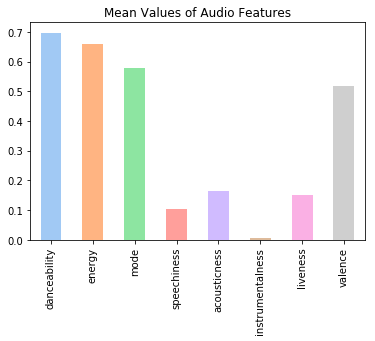

In [36]:
#create a bar chart of the mean values of the audio features in the small dataset
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()


Mean value for danceability: 0.6968199999999999


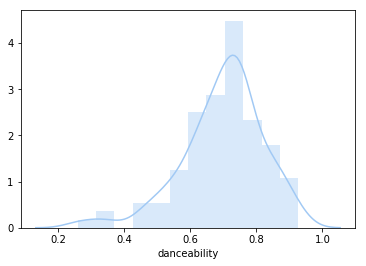

In [43]:
#mean value and distplot for danceability feature
print("Mean value for danceability:", music['danceability'].mean())
sns.distplot(music['danceability'])
plt.show()

With a mean value of 0.697, it's clear that the majority of the top tracks have a high danceability rating.
Conclusion: People like to stream songs they can dance to. I wonder if this says anything about when/where people stream songs? (Parties etc.?)

Mean value for energy: 0.6606899999999999


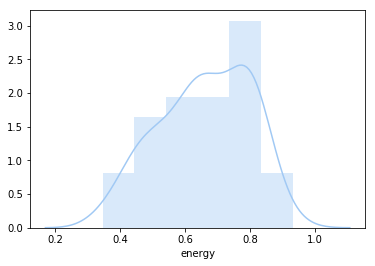

In [38]:
#mean value and distplot for energy feature
print("Mean value for energy:", music['energy'].mean())
sns.distplot(music['energy'])
plt.show()

Again, people seem like energetic songs more than calm ones (mean of 0.661), although this feature seems to be a bit more evenly distributed than danceability.
Conclusion: People like energetic songs. I wonder what the ages of Spotify users are?

Mean value for loudness: -5.652649999999998


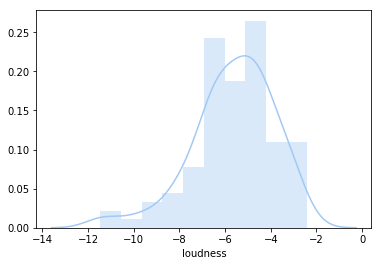

In [39]:
#mean value and distplot for loudness feature
print("Mean value for loudness:", music['loudness'].mean())
sns.distplot(music['loudness'])
plt.show()

So the mean value for loudness is -5.653. I'm still kind of confused on how to interpret this (Why are the values negative? Does a more negative value mean less loud or more loud?). If anybody has some insight, it would be greatly appreciated!
Conclusion: ??

Mean value for instrumentalness: 0.0047961442


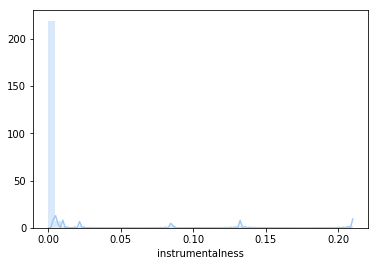

In [40]:
#mean value and distplot for instrumentalness feature
print("Mean value for instrumentalness:", music['instrumentalness'].mean())
sns.distplot(music['instrumentalness'])
plt.show()

The mean value for instrumentalness is really, really low at 0.00479.
Conclusion: People like songs that have lyrics.

Mean value for tempo feature: 119.20245999999996


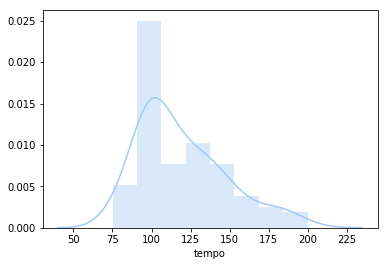

In [41]:
#mean value and distplot for tempo feature
print('Mean value for tempo feature:', music['tempo'].mean())
sns.distplot(music['tempo'])
plt.show()

The mean value for tempo is 119.202 bpm, which is actually pretty fast.
Conclusion: People like fast songs more than slow ones.

Mean value for duration_ms feature: 218387.28


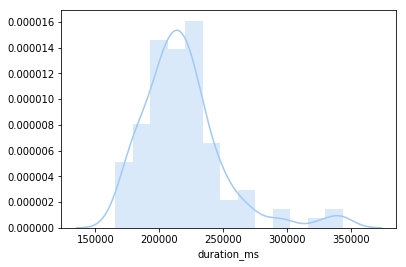

In [42]:
#mean value and distplot for duration_ms feature
print('Mean value for duration_ms feature:', music['duration_ms'].mean())
sns.distplot(music['duration_ms'])
plt.show()

The mean value for duration is 218387 milliseconds, which is around 3 minutes and 38 seconds.
Conclusion: People don't like it when songs are too short or too long. 